# **Visualização de Dados** com *Matplotlib* e *Seaborn*  

**Objetivo**:
1) configurar o ambiente de visualização;  
2) escolher o tipo de gráfico adequado ao objetivo de análise;  
3) construir gráficos com **Matplotlib** e **Seaborn** (camada estatística/estilização);  
4) interpretar os resultados e **conectar com perguntas de negócio**.

**Fontes de dados dos exemplos** (mesma de aulas anteriores):
- **NumPy**: matriz 3×7 com temperaturas semanais para *Augusto Pestana*, *Santa Rosa* e *Ijuí* (domingo --> sábado), incluindo variações por chuva e massa de ar seco.
- **Pandas**: arquivo `sales_data.csv` com colunas: *Produto*, *Categoria*, *Preço Unitário (R$)*, *Quantidade Vendida*, *Total de Vendas (R$)*, *Data da Venda*.

## 1) Preparação do Ambiente (instalação + imports)

- Garantir que as bibliotecas estão disponíveis.  
- Importar os pacotes.

In [3]:
# %pip install --upgrade pip
# %pip install matplotlib seaborn pandas numpy

In [4]:

# Imports 
import numpy as np                  # Vetores e matrizes (NumPy)
import pandas as pd                 # Tabelas, séries temporais e groupby (Pandas)
import matplotlib.pyplot as plt     # Biblioteca base de gráficos
import seaborn as sns               # Interface de alto nível para gráficos estatísticos

# Ajustes de estilo globais: deixam os gráficos mais legíveis
plt.rcParams["figure.figsize"] = (9, 5)  # tamanho padrão das figuras
plt.rcParams["axes.grid"] = True         # grade para facilitar leitura
plt.rcParams["grid.linestyle"] = ":"     # grade pontilhada
sns.set_theme()                          # tema visual do seaborn (cores dependem do tema)


## 2) Dados NumPy — Temperaturas (3 cidades × 7 dias)

- Definir **cidades** e **dias**.  
- Construir a **matriz** 3×7 de temperaturas da 1ª semana (*linhas=cidades, colunas=dias*).  
- Gerar a 2ª semana com **ajuste de chuva**.  
- Gerar a 3ª semana com **massa de ar seco** (+10°C em todas as entradas).

**Resultado esperado:** três matrizes NumPy que serão usadas para gráficos.  

In [5]:
# 2.1) Vetores de rótulos
cidades = np.array(["Augusto Pestana", "Santa Rosa", "Ijuí"])   # rótulos das 3 linhas
dias = ["Domingo","Segunda","Terça","Quarta","Quinta","Sexta","Sábado"]  # rótulos das 7 colunas

# 2.2) Matriz 3×7 da 1ª semana
# Cada linha corresponde a uma cidade (na mesma ordem do vetor 'cidades')
# Cada coluna corresponde a um dia da semana (na mesma ordem do vetor 'dias')
primeira_semana = np.array([
    [20, 21, 23, 26, 28, 27, 25],  # Augusto Pestana
    [16, 18, 21, 25, 27, 26, 22],  # Santa Rosa
    [17, 19, 22, 24, 26, 25, 21]   # Ijuí
])

# 2.3) Ajuste por chuva: vetor 1×7 "espalha" sobre as 3 linhas
ajuste_chuva = np.array([-5, -5, -5, -2, -2, -2, 0])
segunda_semana = primeira_semana + ajuste_chuva

# 2.4) Massa de ar seco: soma (+10) em todos os elementos
terceira_semana = segunda_semana + 10

# Agrupar para iteração futura
semanas = [primeira_semana, segunda_semana, terceira_semana]

# Conferência rápida
print("Semana 1:\n", primeira_semana)
print("\nSemana 2 (com chuva):\n", segunda_semana)
print("\nSemana 3 (+10°C):\n", terceira_semana)

Semana 1:
 [[20 21 23 26 28 27 25]
 [16 18 21 25 27 26 22]
 [17 19 22 24 26 25 21]]

Semana 2 (com chuva):
 [[15 16 18 24 26 25 25]
 [11 13 16 23 25 24 22]
 [12 14 17 22 24 23 21]]

Semana 3 (+10°C):
 [[25 26 28 34 36 35 35]
 [21 23 26 33 35 34 32]
 [22 24 27 32 34 33 31]]


## 3) Visualizações com **Matplotlib** (nível base)

### 3.1 Gráfico de **linha** — evolução diária (Semana 1)

Quando o objetivo é acompanhar **evolução ao longo de um eixo ordenado** (tempo/dias), linhas conectam os pontos e enfatizam **tendência**.

**O código:**  
- Cria uma figura/axes com `plt.subplots()`.  
- Percorre as 3 cidades e plota `dias` (eixo x) × `temperaturas` (eixo y).  
- Marca pontos (`marker="o"`) para facilitar leitura.  
- Adiciona título, rótulos e legenda.  

**Como saída:**  
Três linhas (uma por cidade) mostrando a variação de °C de domingo a sábado na **Semana 1**.

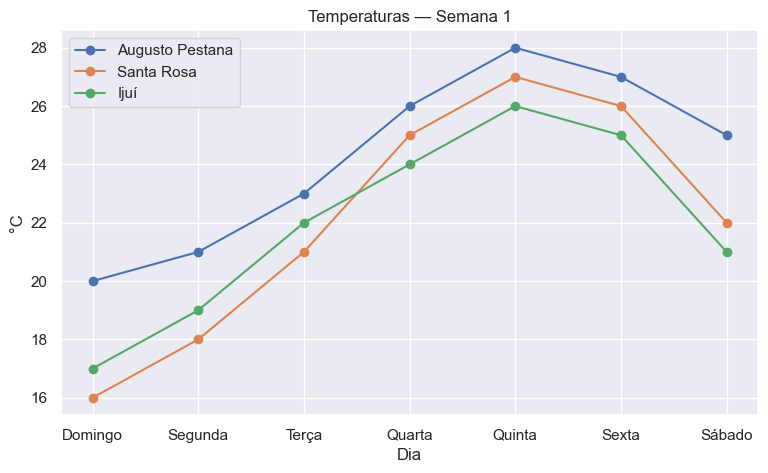

In [7]:
fig, ax = plt.subplots()                     # figura + eixo
for i, cidade in enumerate(cidades):         # para cada cidade...
    ax.plot(dias, primeira_semana[i],        # x = dias, y = linha correspondente da matriz
            marker="o", label=cidade)        # pontos visíveis + legenda
ax.set_title("Temperaturas — Semana 1")      # título
ax.set_xlabel("Dia")                         # rótulo do eixo x
ax.set_ylabel("°C")                          # rótulo do eixo y
ax.legend()                                  # legenda com nomes das cidades
plt.show()                                   # renderiza a figura

### 3.2 Gráfico de **barras** — média semanal por cidade

Barras comparam **quantidades agrupadas** (ex.: médias, somas). Neste exemplo, queremos comparar a **média da semana** entre as cidades.

**O código:**  
- Calcula a média por linha (`mean(axis=1)` → média por cidade).  
- Usa `ax.bar()` com rótulos no eixo x (`cidades`) e valores no eixo y (`medias`).  
- Coloca borda (`edgecolor="k"`) para destacar barras.

**Como saída:**  
Três barras (uma por cidade) com suas respectivas **médias semanais**.


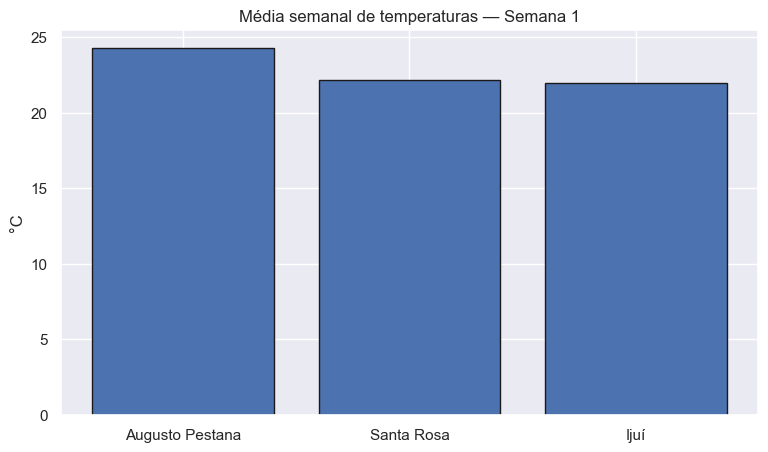

In [10]:
medias = primeira_semana.mean(axis=1)  # média por cidade (linha)
fig, ax = plt.subplots()
ax.bar(cidades, medias, edgecolor="k")
ax.set_title("Média semanal de temperaturas — Semana 1")
ax.set_ylabel("°C")
plt.show()


### 3.3 **Subplots** — comparando as 3 semanas lado a lado

Subplots permitem **comparar cenários** mantendo o mesmo tipo de gráfico, lado a lado.

**O código:**  
- Cria uma grade 1×3 de eixos (`sharey=True` para a mesma escala de °C).  
- Em cada eixo, plota a evolução diária de cada cidade para a semana correspondente.  
- Coloca legenda apenas no último para evitar poluição visual.

**Como saída:**  
Três gráficos de linha, um para cada semana, facilitando a **comparação visual** entre os efeitos de chuva e massa de ar seco.


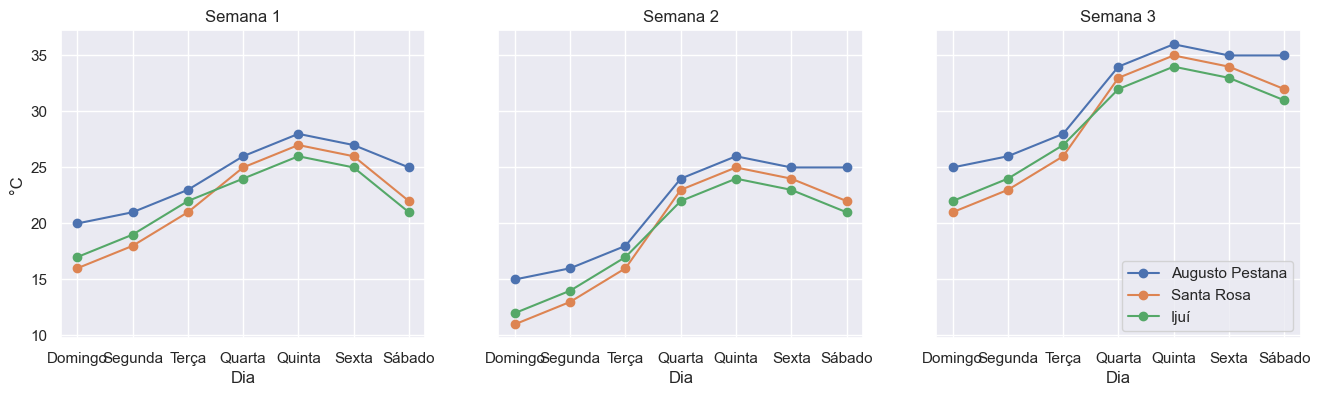

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey=True)
for j, (sem, titulo) in enumerate(zip(semanas, ["Semana 1","Semana 2","Semana 3"])):
    ax = axes[j]
    for i, cidade in enumerate(cidades):
        ax.plot(dias, sem[i], marker="o", label=cidade)
    ax.set_title(titulo)
    ax.set_xlabel("Dia")
axes[0].set_ylabel("°C")
axes[-1].legend(loc="lower right")
plt.show()

## 4) Dados **Pandas** — Vendas (`sales_data.csv`)

- Carregar o CSV para um `DataFrame`.  
- Verificar as primeiras linhas para confirmar **esquema** e **tipos**.  
- A partir do arquivo, produzir gráficos que respondem perguntas típicas de **análise de vendas**.

In [12]:
# Carrega o dataset de vendas (mesmo usado na aula 11 de Pandas)
df = pd.read_csv("sales_data.csv")

# Primeiras linhas para confirmar colunas e tipos
display(df.head())

# Colunas esperadas (checa se faltou algo)
print("Colunas:", list(df.columns))

,Produto,Categoria,Preço Unitário (R$),Quantidade Vendida,Total de Vendas (R$),Data da Venda
0,Brinquedos Value,Brinquedos,642.62,15,9639.30,2024-04-03
1,Móveis End,Móveis,53.12,1,53.12,2024-11-23
2,Vestuário Benefit,Vestuário,957.08,17,16270.36,2024-06-03
3,Vestuário Organization,Vestuário,1737.15,8,13897.20,2024-09-23
4,Eletrônicos Want,Eletrônicos,866.41,15,12996.15,2024-01-15


Colunas: ['Produto', 'Categoria', 'Preço Unitário (R$)', 'Quantidade Vendida', 'Total de Vendas (R$)', 'Data da Venda']


### 4.1 Barras — **Total de Vendas por Categoria** (agrupamento)

*Quais categorias geram mais receita?*  
**Gráfico de barras:** Comparação direta de **somas** por grupo.

**O código:**  
- `groupby("Categoria")["Total de Vendas (R$)"].sum()` agrupa por categoria;  
- `sort_values(ascending=False)` ordena do maior para o menor;  
- `ax.bar()` plota.

**Como saída:**  
Gráfico de barras ordenadas por total de vendas, permitindo identificar **categorias** com mais receita.

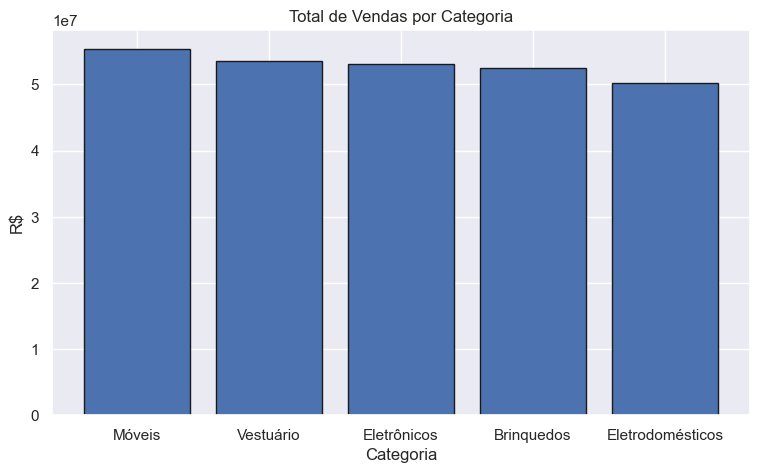

In [16]:
vendas_por_cat = (df
                  .groupby("Categoria")["Total de Vendas (R$)"]
                  .sum()
                  .sort_values(ascending=False))

fig, ax = plt.subplots()
ax.bar(vendas_por_cat.index, vendas_por_cat.values, edgecolor="k")
ax.set_title("Total de Vendas por Categoria")
ax.set_xlabel("Categoria")
ax.set_ylabel("R$")
plt.show()

### 4.2 Linha — **Série temporal** de vendas (soma diária)

*Como a receita evolui **dia a dia**?*  
**Gráfico de linhas:** Destaca **tendências temporais** e comportamentos que se repetem tempos em tempos.

**O código:**  
- Converte `Data da Venda` para `datetime`.  
- Define como índice e **reagrupa** por dia com `resample("D").sum()`.  
- Plota a série resultante.

**Como saída:**  
Uma linha com variação diária do **Total de Vendas**, útil para detectar **picos**.

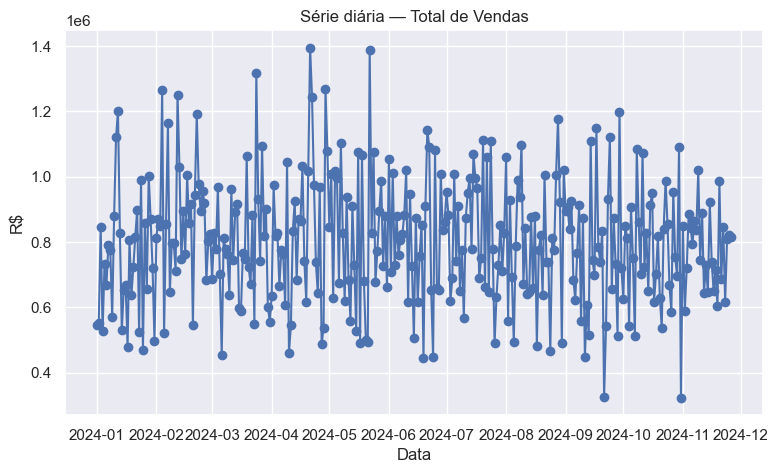

In [17]:
df["Data da Venda"] = pd.to_datetime(df["Data da Venda"])  # garante tipo datetime
serie_diaria = (df
                .set_index("Data da Venda")
                .resample("D")["Total de Vendas (R$)"]
                .sum()
                .fillna(0))  # dias sem venda viram 0, mantendo a continuidade temporal

fig, ax = plt.subplots()
ax.plot(serie_diaria.index, serie_diaria.values, marker="o")
ax.set_title("Série diária — Total de Vendas")
ax.set_xlabel("Data")
ax.set_ylabel("R$")
plt.show()

### 4.3 Histograma — **Distribuição** de Preço Unitário

*Como os preços unitários estão distribuidos?*  
**Gráfico do tipo histograma:** Mostra **frequências** por faixas (bins), útil para analisar **concentrações**.

**O código:**  
- Usa `ax.hist()` com `bins=15`.  
- Borda preta para leitura e `alpha` para leve transparência.

**Como saída:**  
Uma distribuição de preços, permitindo inferir **faixas comuns** ou **valores atípicos**.

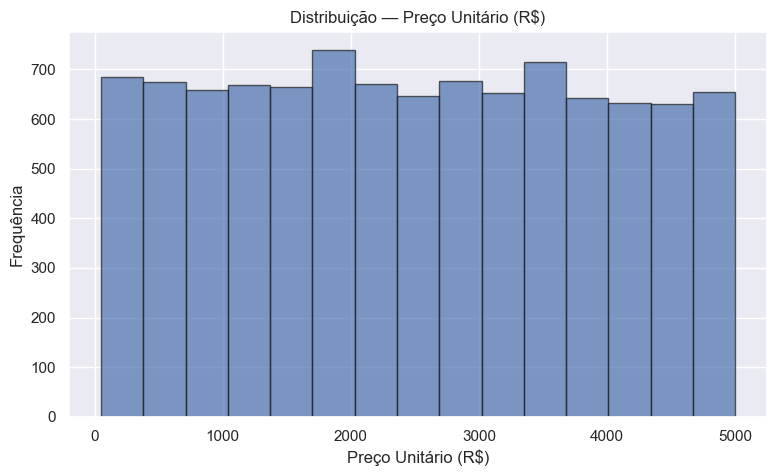

In [21]:
fig, ax = plt.subplots()
ax.hist(df["Preço Unitário (R$)"], bins=15, edgecolor="k", alpha=0.7)
ax.set_title("Distribuição — Preço Unitário (R$)")
ax.set_xlabel("Preço Unitário (R$)")
ax.set_ylabel("Frequência")
plt.show()

### 4.4 Boxplot — **Dispersão** de Total de Vendas por Categoria

*Como varia o total de vendas dentro de cada categoria?*  
**Gráfico boxplot:** Resume **mediana, quartis e possíveis outliers**, facilitando comparação entre grupos.

**O código:**  
- Cria uma lista de arrays (um por categoria).  
- Plota com `ax.boxplot(...)` e rotula com o nome de cada categoria.

**Como saída:**  
Caixas comparáveis que mostram **medianas** e **dispersões** por categoria.

C:\Users\makel\AppData\Local\Temp\ipykernel_19808\4285427078.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(dados_por_cat, labels=labels, vert=True)


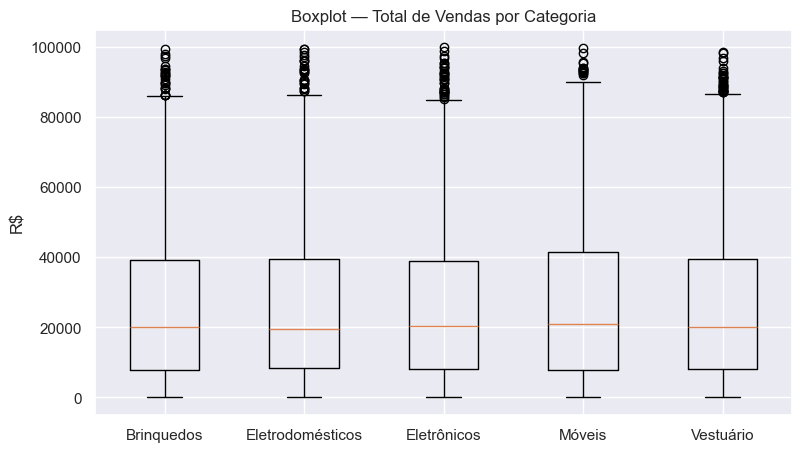

In [27]:
dados_por_cat = [grp["Total de Vendas (R$)"].values for _, grp in df.groupby("Categoria")]
labels = [cat for cat, _ in df.groupby("Categoria")]
fig, ax = plt.subplots()
ax.boxplot(dados_por_cat, labels=labels, vert=True)
ax.set_title("Boxplot — Total de Vendas por Categoria")
ax.set_ylabel("R$")
plt.show()

## 5) Visualizações com **Seaborn** (nível alto + estatística)

**Quando preferir Seaborn?**  
- Optar pelo **Seaborn** quando precisar de **agrupamentos estatísticos** embutidos, **legendas automáticas**, e um estilo visual com menos código.

### 5.1 **Gráfico Heatmap** — temperaturas (Semana 1)
Mostra uma **matriz** de valores com cores, uma boa opção para padrões/diferenças por **cidade × dia**.

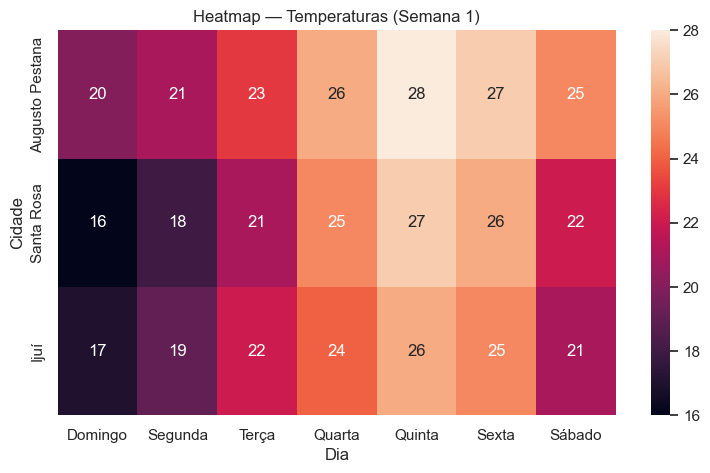

In [28]:

# Converter a matriz em DataFrame com rótulos para o heatmap
df_temp = pd.DataFrame(primeira_semana, index=cidades, columns=dias)
sns.heatmap(df_temp, annot=True, fmt="d")  # annot=True desenha os números; fmt="d" → inteiros
plt.title("Heatmap — Temperaturas (Semana 1)")
plt.xlabel("Dia")
plt.ylabel("Cidade")
plt.show()


### 5.2 **Histplot** — distribuição de Preço Unitário  
Parecido (equivalente) com o histograma, com opção de **curva de densidade** (KDE). Útil para visualizar **tendências**.

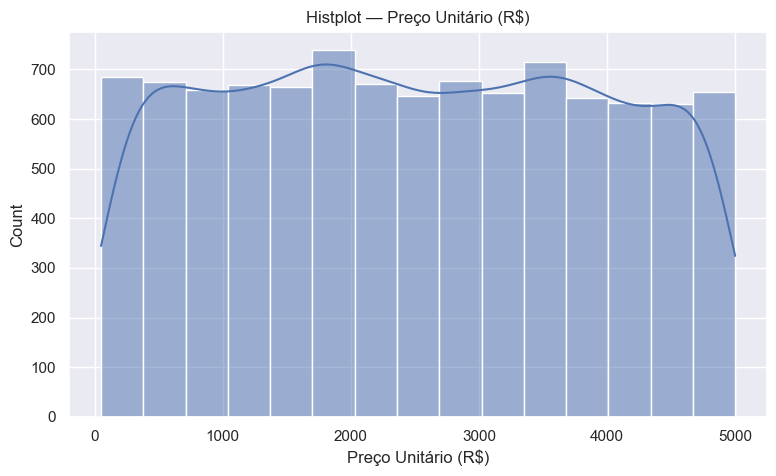

In [29]:
sns.histplot(data=df, x="Preço Unitário (R$)", bins=15, kde=True)
plt.title("Histplot — Preço Unitário (R$)")
plt.show()

### 5.3 **Barplot** — Total de Vendas por Categoria (soma)  
`estimator=sum` agrupa automaticamente; `ci=None` remove intervalos de confiança (que não fazem sentido ao somar totais).

C:\Users\makel\AppData\Local\Temp\ipykernel_19808\2172602692.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Categoria", y="Total de Vendas (R$)", estimator=sum, ci=None)


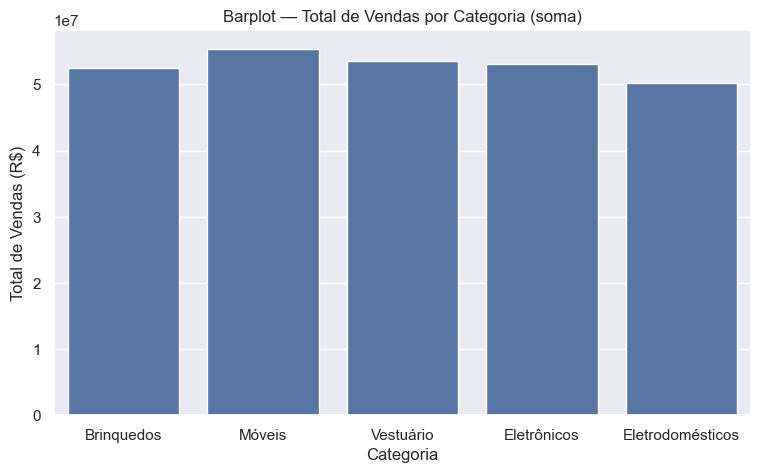

In [30]:
sns.barplot(data=df, x="Categoria", y="Total de Vendas (R$)", estimator=sum, ci=None)
plt.title("Barplot — Total de Vendas por Categoria (soma)")
plt.show()

### 5.4 **Boxplot** e **Violinplot** — Total de Vendas por Categoria  
- **Gráfico boxplot**: estatísticas resumo (quartis/outliers).  
- **Gráfico violinplot**: forma da distribuição (densidade).  
Juntos, complementam a interpretação.

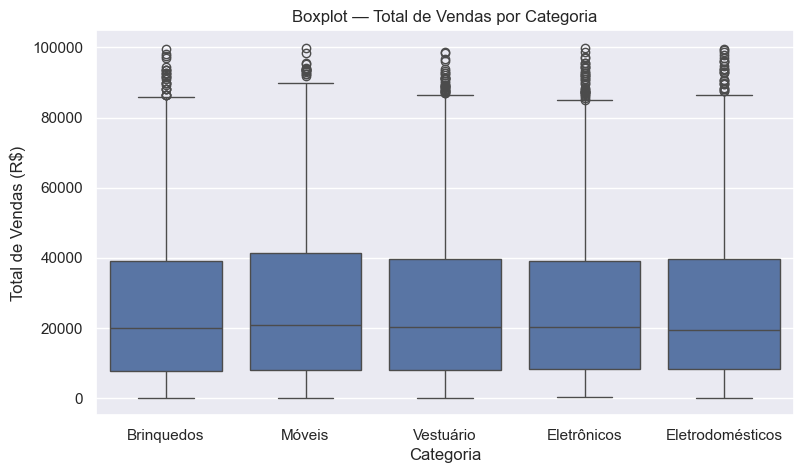

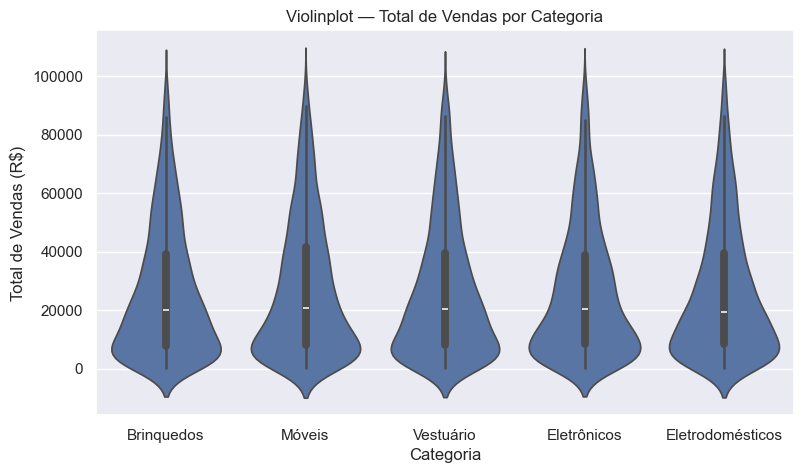

In [31]:
sns.boxplot(data=df, x="Categoria", y="Total de Vendas (R$)")
plt.title("Boxplot — Total de Vendas por Categoria")
plt.show()

sns.violinplot(data=df, x="Categoria", y="Total de Vendas (R$)")
plt.title("Violinplot — Total de Vendas por Categoria")
plt.show()

### 5.5 **Scatterplot** — relação **Preço × Total de Vendas**  
*Há correlação entre preço unitário e total vendido?*  
**Olhar para:** padrões, agrupamentos por categoria, outliers.

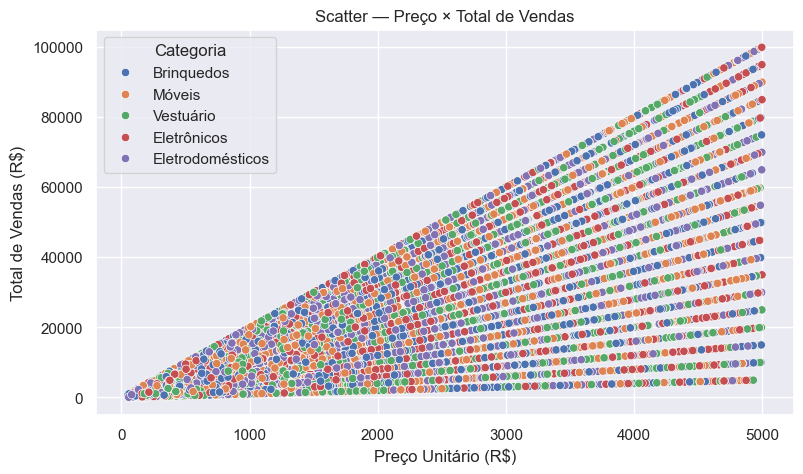

In [32]:
sns.scatterplot(data=df, x="Preço Unitário (R$)", y="Total de Vendas (R$)", hue="Categoria")
plt.title("Scatter — Preço × Total de Vendas")
plt.show()


### 5.6 **Pairplot** — correlações entre variáveis numéricas  
Gera uma **matriz de dispersão** + histogramas nas diagonais, útil para visão geral de correlações.


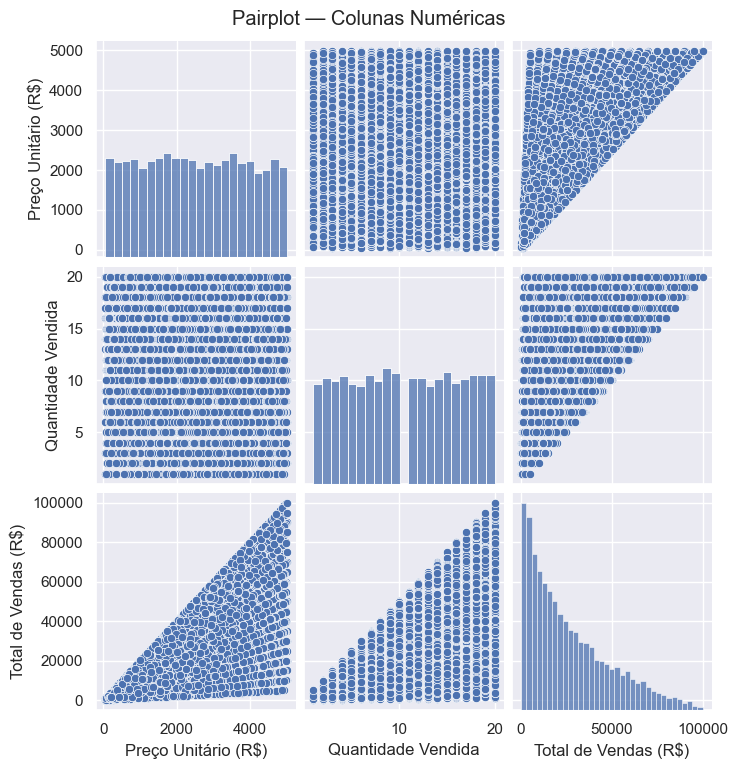

In [33]:
num_cols = ["Preço Unitário (R$)", "Quantidade Vendida", "Total de Vendas (R$)"]
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot — Colunas Numéricas", y=1.02)
plt.show()